In [33]:
import pandas as pd
population = pd.DataFrame([{'Zipcode': 16855, '2010 Census Population':282},
                          {'Zipcode': 15681, '2010 Census Population':5241},
                          {'Zipcode': 18657, '2010 Census Population':11985},
                          {'Zipcode': 17307, '2010 Census Population':5899},
                          {'Zipcode': 15635, '2010 Census Population':220}])

revenue =  pd.DataFrame([{'city':'Austin','branch_id':10,'revenue':100},
                        {'city':'Denver','branch_id':20,'revenue':83},       
                        {'city':'Springfield','branch_id':30, 'revenue':4},
                        {'city':'Mendocino','branch_id':47,'revenue':200}])

managers = pd.DataFrame([{'city':'Austin','branch_id':10,'manager':'Charles'},
                        {'city':'Denver','branch_id':20,'manager':'Joel'},
                        {'city':'Mendocino','branch_id':47,'manager':'Brett'},
                        {'city':'Springfield','branch_id':31,'manager':'Sally'}])

# Merging DataFrames with Pandas

## Chapter 3 - Merging Data

Often we need to combine DataFrames along multiple columns or along columns other than the index, so using .append() to stack the DataFrames or pd.concat() is not sufficient enough. Merging DataFrames is done with a merg function that extends .concat() to align using multiple columns. 

### Merging
With the DataFrames population and cities, shown below, merging the DataFrames to link cities to population information based on the common zip code, that is not the index can be done with pd.merge() function. This will compute a merge on all columns that both DataFrames have in common, in this case the Zipcode column. What this means is that any row in which the zipcode entry in cities matches a row in population, a new row is made in a new DataFrame. The new role contains the row from population with the other columns in the corresponding row in cities. This is, by default, an inner join as we saw with .concat(). It's an inner join because it only glues together the rows that match in both DataFrames. 

In [6]:
population

,Zipcode,2010 Census Population
0,16855,282
1,15681,5241
2,18657,11985
3,17307,5899
4,15635,220


In [10]:
cities = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\pa_zipcode_city.csv')
print(cities)

    Zipcode             City State
0     17545          MANHEIM    PA
1     18455     PRESTON PARK    PA
2     17307      BIGLERVILLE    PA
3     15705          INDIANA    PA
4     16833     CURWENSVILLE    PA
5     16220            CROWN    PA
6     18618     HARVEYS LAKE    PA
7     16855  MINERAL SPRINGS    PA
8     16623        CASSVILLE    PA
9     15635       HANNASTOWN    PA
10    15681        SALTSBURG    PA
11    18657      TUNKHANNOCK    PA
12    15279       PITTSBURGH    PA
13    17231        LEMASTERS    PA
14    18821       GREAT BEND    PA


In [11]:
pd.merge(population, cities)

,Zipcode,2010 Census Population,City,State
0,16855,282,MINERAL SPRINGS,PA
1,15681,5241,SALTSBURG,PA
2,18657,11985,TUNKHANNOCK,PA
3,17307,5899,BIGLERVILLE,PA
4,15635,220,HANNASTOWN,PA


### Medal DataFrames

The bronze and gold medal DataFrames below have the same number of columns with the same column names, by default, the .merge() function will result in an empty DataFrame. Because, by default, merge uses all columns that are common to both DataFrames to merge. Because the Total columns don't have values that are the same, even though the Country columns have rows in common. 

In [41]:
bronze = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\bronze_top5.csv')
gold = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\gold_top5.csv')
print(bronze)
print(gold)

pd.merge(bronze, gold).info

   NOC         Country  Total
0  USA   United States   1052
1  USR    Soviet Union    584
2  GBR  United Kingdom    505
3  FRA          France    475
4  GER         Germany    454
   NOC         Country  Total
0  USA   United States   2088
1  USR    Soviet Union    838
2  GBR  United Kingdom    498
3  ITA           Italy    460
4  GER         Germany    407


<bound method DataFrame.info of Empty DataFrame
Columns: [NOC, Country, Total]
Index: []>

### Merging On

Instead we can choose a particular column to merge on using the on= option. When NOC is selected to merge on, matches are sort only in the NOC column and the remaining columns are appended to the right. The column labels are modified with underscore x and underscore y to indicate their origin; x for the first argument to merge and y for the second, bronze and gold in this case. Notice that Country_x and Country_y are identical. 

In [42]:
pd.merge(bronze, gold, on='NOC')

,NOC,Country_x,Total_x,Country_y,Total_y
0,USA,United States,1052,United States,2088
1,USR,Soviet Union,584,Soviet Union,838
2,GBR,United Kingdom,505,United Kingdom,498
3,GER,Germany,454,Germany,407


### Merging on Multiple Columns

To eliminate the redundant country columns, provide the on = option a list of columns to merge on, in this case, NOC and Country. This is where merging extends concatenation in allowing matching on multiple columns. 

In [43]:
pd.merge(bronze, gold, on=['NOC', 'Country'])

,NOC,Country,Total_x,Total_y
0,USA,United States,1052,2088
1,USR,Soviet Union,584,838
2,GBR,United Kingdom,505,498
3,GER,Germany,454,407


### Using Suffixes

The columns still have the x and y identifiers and that can be modified by passing the suffixes = option a list of suffixes to use in the new columns.

In [44]:
pd.merge(bronze, gold, on=['NOC', 'Country'], suffixes = ['_bronze', '_gold'])

,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052,2088
1,USR,Soviet Union,584,838
2,GBR,United Kingdom,505,498
3,GER,Germany,454,407


### Specifying Columns to Merge

Merging works well when the column labels match, but it can also address when the column names differ. If we look at the PA counties DataFrame and the cities DataFrame of PA cities, they each have a column that reference cities, but one called City Name and the other City. As the labels differ, it is necessary to declare which columns to merge on. In this case we use the left_on= and right_on= options to specify which column from each DataFrame being merged, as listed left to right.

In [21]:
print(cities)
counties = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\pa_counties.csv')
print(counties)
print()
print()
pd.merge(counties, cities, left_on='City Name', right_on='City')

    Zipcode             City State
0     17545          MANHEIM    PA
1     18455     PRESTON PARK    PA
2     17307      BIGLERVILLE    PA
3     15705          INDIANA    PA
4     16833     CURWENSVILLE    PA
5     16220            CROWN    PA
6     18618     HARVEYS LAKE    PA
7     16855  MINERAL SPRINGS    PA
8     16623        CASSVILLE    PA
9     15635       HANNASTOWN    PA
10    15681        SALTSBURG    PA
11    18657      TUNKHANNOCK    PA
12    15279       PITTSBURGH    PA
13    17231        LEMASTERS    PA
14    18821       GREAT BEND    PA
         City Name    County Name
0        SALTSBURG        Indiana
1  MINERAL SPRINGS     Clearfield
2      BIGLERVILLE          Adams
3       HANNASTOWN   Westmoreland
4      TUNKHANNOCK        Wyoming




,City Name,County Name,Zipcode,City,State
0,SALTSBURG,Indiana,15681,SALTSBURG,PA
1,MINERAL SPRINGS,Clearfield,16855,MINERAL SPRINGS,PA
2,BIGLERVILLE,Adams,17307,BIGLERVILLE,PA
3,HANNASTOWN,Westmoreland,15635,HANNASTOWN,PA
4,TUNKHANNOCK,Wyoming,18657,TUNKHANNOCK,PA


### Exercise 1

#### Merging on a specific column
This exercise follows on the last one with the DataFrames revenue and managers for your company. You expect your company to grow and, eventually, to operate in cities with the same name on different states. As such, you decide that every branch should have a numerical branch identifier. Thus, you add a branch_id column to both DataFrames. Moreover, new cities have been added to both the revenue and managers DataFrames as well. pandas has been imported as pd and both DataFrames are available in your namespace.

At present, there should be a 1-to-1 relationship between the city and branch_id fields. In that case, the result of a merge on the city columns ought to give you the same output as a merge on the branch_id columns. Do they? Can you spot an ambiguity in one of the DataFrames?

__Instructions:__
 * Using pd.merge(), merge the DataFrames revenue and managers on the 'city' column of each. Store the result as merge_by_city.
 * Print the DataFrame merge_by_city. This has been done for you.
 * Merge the DataFrames revenue and managers on the 'branch_id' column of each. Store the result as merge_by_id.
 * Print the DataFrame merge_by_id. This has been done for you, so hit 'Submit Answer' to see the result!

In [29]:
# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(revenue, managers, on='city' )

# Print merge_by_city
print(merge_by_city)

# Merge revenue with managers on 'branch_id': merge_by_id
merge_by_id = pd.merge(revenue, managers, on='branch_id')

# Print merge_by_id
print(merge_by_id)

          city  branch_id_x  revenue  branch_id_y  manager
0       Austin           10      100           10  Charles
1       Denver           20       83           20     Joel
2  Springfield           30        4           31    Sally
3    Mendocino           47      200           47    Brett
      city_x  branch_id  revenue     city_y  manager
0     Austin         10      100     Austin  Charles
1     Denver         20       83     Denver     Joel
2  Mendocino         47      200  Mendocino    Brett


Well done! Notice that when you merge on 'city', the resulting DataFrame has a peculiar result: In row 2, the city Springfield has two different branch IDs. This is because there are actually two different cities named Springfield - one in the State of Illinois, and the other in Missouri. The revenue DataFrame has the one from Illinois, and the managers DataFrame has the one from Missouri. Consequently, when you merge on 'branch_id', both of these get dropped from the merged DataFrame.

#### Merging on columns with non-matching labels
You continue working with the revenue & managers DataFrames from before. This time, someone has changed the field name 'city' to 'branch' in the managers table. Now, when you attempt to merge DataFrames, an exception is thrown:
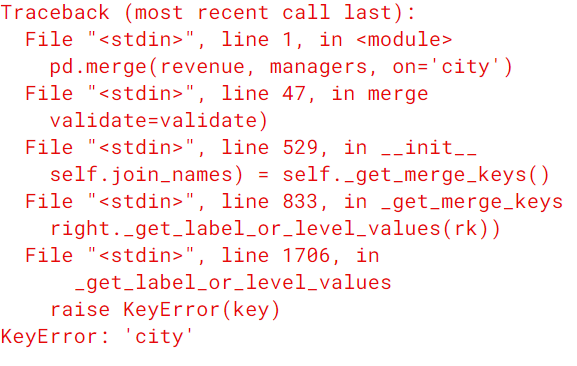
Given this, it will take a bit more work for you to join or merge on the city/branch name. You have to specify the left_on and right_on parameters in the call to pd.merge().

As before, pandas has been pre-imported as pd and the revenue and managers DataFrames are in your namespace. They have been printed in the IPython Shell so you can examine the columns prior to merging.

Are you able to merge better than in the last exercise? How should the rows with Springfield be handled?

__Instructions:__
 * Merge the DataFrames revenue and managers into a single DataFrame called combined using the 'city' and 'branch' columns from the appropriate DataFrames.
 * In your call to pd.merge(), you will have to specify the parameters left_on and right_on appropriately.
 * Print the new DataFrame combined.

In [36]:
revenue2 =  pd.DataFrame([{'city':'Austin','branch_id':10,'state':'TX','revenue':100},
                        {'city':'Denver','branch_id':20,'state':'CO','revenue':83},       
                        {'city':'Springfield','branch_id':30,'state':'IL', 'revenue':4},
                        {'city':'Mendocino','branch_id':47,'state':'CA','revenue':200}])

managers2 = pd.DataFrame([{'branch':'Austin','branch_id':10,'state':'TX','manager':'Charles'},
                        {'branch':'Denver','branch_id':20,'state':'CO','manager':'Joel'},
                        {'branch':'Mendocino','branch_id':47,'state':'CA','manager':'Brett'},
                        {'branch':'Springfield','branch_id':31,'state':'MO','manager':'Sally'}])

# Merge revenue & managers on 'city' & 'branch': combined
combined = pd.merge(revenue2, managers2, left_on='city', right_on='branch')

# Print combined
print(combined)

          city  branch_id_x state_x  revenue       branch  branch_id_y  \
0       Austin           10      TX      100       Austin           10   
1       Denver           20      CO       83       Denver           20   
2  Springfield           30      IL        4  Springfield           31   
3    Mendocino           47      CA      200    Mendocino           47   

  state_y  manager  
0      TX  Charles  
1      CO     Joel  
2      MO    Sally  
3      CA    Brett  


#### Merging on multiple columns
Another strategy to disambiguate cities with identical names is to add information on the states in which the cities are located. To this end, you add a column called state to both DataFrames from the preceding exercises. Again, pandas has been pre-imported as pd and the revenue and managers DataFrames are in your namespace.

Your goal in this exercise is to use pd.merge() to merge DataFrames using multiple columns (using 'branch_id', 'city', and 'state' in this case).

Are you able to match all your company's branches correctly?

__Instructions:__
 * Create a column called 'state' in the DataFrame revenue, consisting of the list ['TX','CO','IL','CA'].
 * Create a column called 'state' in the DataFrame managers, consisting of the list ['TX','CO','CA','MO'].
 * Merge the DataFrames revenue and managers using three columns :'branch_id', 'city', and 'state'. Pass them in as a list to the on paramater of pd.merge().

In [37]:
# Add 'state' column to revenue: revenue['state']
revenue['state'] = ['TX','CO','IL','CA']

# Add 'state' column to managers: managers['state']
managers['state'] = ['TX','CO','CA','MO']

# Merge revenue & managers on 'branch_id', 'city', & 'state': combined
combined = pd.merge(revenue, managers, on=['branch_id','city','state'])

# Print combined
print(combined)

        city  branch_id  revenue state  manager
0     Austin         10      100    TX  Charles
1     Denver         20       83    CO     Joel
2  Mendocino         47      200    CA    Brett


### Joining DataFrames

Pandas has to search through DataFrame rows when computing joins and merges so it's useful to have different types of joins to mitigate performance costs. Using the bronze and gold medal data again, using the .merge() function will do an inner join by default.

In [45]:
pd.merge(bronze, gold, on=['NOC', 'Country'], suffixes = ['_bronze', '_gold'], how = 'inner')

,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052,2088
1,USR,Soviet Union,584,838
2,GBR,United Kingdom,505,498
3,GER,Germany,454,407


#### Merging with Left Join

When the how = option is changed from the default 'inner' to 'left', all the rows in the first, or left DataFrame listed are merged into the new DataFrame.
 * For rows in the left DataFrame that have a matching row in the right DataFrame:
> * Non-joining columns of the right DataFrame are appended to the left DataFrame
 * For rows in the left DataFrame that don't have a matching row in the right DataFrame:
> * Non-joining columns are filled with nulls

What this means is that when joining the bronze and gold datasets, in that order, and setting the how = option to 'left', the row data for France that is in the bronze dataset, but not in the gold dataset will be in the new merged DataFrame and it's value for the gold column will be set to Null.

In [46]:
pd.merge(bronze, gold,on=['NOC', 'Country'], suffixes = ['_bronze', '_gold'], how = 'left')

,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052,2088.0
1,USR,Soviet Union,584,838.0
2,GBR,United Kingdom,505,498.0
3,FRA,France,475,NaN
4,GER,Germany,454,407.0


#### Merging with Right Join

When using the option how='right', the new merged DataFrame will be created the same way as with the left option, but the left and right DataFrames are interchanged, so now all the rows of the right or second listed DataFrame will be in the new, merged DataFrame and any rows that are in the left DataFrame will have Null values entered for their column that came from the right DataFrame. So, in this case all 5 rows from the gold DataFrame are preserved, but because Italy isn't in the top 5 list for bronze medals, the total for the bronze column is Null. 

In [48]:
pd.merge(bronze, gold, on=['NOC', 'Country'], suffixes = ['_bronze', '_gold'], how = 'right')

,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052.0,2088
1,USR,Soviet Union,584.0,838
2,GBR,United Kingdom,505.0,498
3,GER,Germany,454.0,407
4,ITA,Italy,NaN,460


#### Merging with Outer Join

In order to merge all the rows from both DataFrames, the how = option should be set to 'outer'. 

In [49]:
pd.merge(bronze, gold, on=['NOC', 'Country'], suffixes = ['_bronze', '_gold'], how = 'outer')

,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052.0,2088.0
1,USR,Soviet Union,584.0,838.0
2,GBR,United Kingdom,505.0,498.0
3,FRA,France,475.0,NaN
4,GER,Germany,454.0,407.0
5,ITA,Italy,NaN,460.0


### Using .join(how='left')

Pandas DataFrames have a join method built in and the default join type is how='left', making it unnecessary to specify when joining DataFrame on the left. Calling .join() on population with unemployment as the option, will bring in all the population rows, with the combined columns of both DataFrames, filling in Null values for those columns where there is not match between the DataFrames. Since only row 2860 is shared between the DataFrames indexes, it is the only row that is complete.

In [53]:
population = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\population_00.csv', index_col='Zip Code ZCTA')
unemployment = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\unemployment.csv', index_col='Zip')
print(population)
print()
print()
print(unemployment)

population.join(unemployment)

                2010 Census Population
Zip Code ZCTA                         
57538                              322
59916                              130
37660                            40038
2860                             45199


        Unemployment   Participants
Zip                                
2860            0.11          34447
46167           0.02           4800
1097            0.33             42
80808           0.07           4310


,2010 Census Population,Unemployment,Participants
Zip Code ZCTA,,,
57538,322,NaN,NaN
59916,130,NaN,NaN
37660,40038,NaN,NaN
2860,45199,0.11,34447.0


### Using .join(how='right')

As you would expect, the newly created DataFrame has all of the rows from the right DataFrame, in this case the one in the parenthesis and again only row with the index 2860 is fully populated, with the remaining fows from the unemployment DataFrame having Null values for the columns that came over from the population DataFrame.

In [54]:
population.join(unemployment, how='right')

,2010 Census Population,Unemployment,Participants
Zip,,,
2860,45199.0,0.11,34447
46167,NaN,0.02,4800
1097,NaN,0.33,42
80808,NaN,0.07,4310


### Using .join(how = 'inner' or 'outer')

When using an inner join, only the rows that have a matching index will be in the resulting DataFrame and when an outer join is called, all the rows are included from both DataFrames and where there is not a matching index, the columns from the other DataFrame are set to Null. Notice that the outer join sorts the combined index. 

In [57]:
print(population.join(unemployment, how='inner'))
print()
print()
print(population.join(unemployment, how='outer'))


       2010 Census Population   Unemployment   Participants
2860                    45199           0.11          34447


        2010 Census Population   Unemployment   Participants
1097                       NaN           0.33           42.0
2860                   45199.0           0.11        34447.0
37660                  40038.0            NaN            NaN
46167                      NaN           0.02         4800.0
57538                    322.0            NaN            NaN
59916                    130.0            NaN            NaN
80808                      NaN           0.07         4310.0


### Which should you use?

Keep it simple:
> * df1.append(df2): when all you need is to stack the datasets vertically
> * pd.concat([df1, df2]): when you need to stack many horizontally or vertically or when you want to do simple inner/outer joins on the indexes.
> * df1.join(df2): gives more flexibility when using left/right or inner/outer joins on indexes.
> * pd.merge([df1, df2]): has the most power and flexibility when joining on multiple columns 

### Exercise 3
#### Left & right merging on multiple columns
You now have, in addition to the revenue and managers DataFrames from prior exercises, a DataFrame sales that summarizes units sold from specific branches (identified by city and state but not branch_id).

Once again, the managers DataFrame uses the label branch in place of city as in the other two DataFrames. Your task here is to employ left and right merges to preserve data and identify where data is missing.

By merging revenue and sales with a right merge, you can identify the missing revenue values. Here, you don't need to specify left_on or right_on because the columns to merge on have matching labels.

By merging sales and managers with a left merge, you can identify the missing manager. Here, the columns to merge on have conflicting labels, so you must specify left_on and right_on. In both cases, you're looking to figure out how to connect the fields in rows containing Springfield.

pandas has been imported as pd and the three DataFrames revenue, managers, and sales have been pre-loaded. They have been printed for you to explore in the IPython Shell.

__Instructions:__
 * Execute a right merge using pd.merge() with revenue and sales to yield a new DataFrame revenue_and_sales.
 * Use how='right' and on=['city', 'state'].
 * Print the new DataFrame revenue_and_sales. This has been done for you.
 * Execute a left merge with sales and managers to yield a new DataFrame sales_and_managers.
 * Use how='left', left_on=['city', 'state'], and right_on=['branch', 'state'].


In [61]:
sales =  pd.DataFrame([{'city':'Austin','state':'TX','units':2},
                        {'city':'Denver','state':'CO','units':4},       
                        {'city':'Springfield','state':'IL','units':1},
                        {'city':'Mendocino','state':'CA','units':1},
                        {'city':'Springfield','state':'MO','units':5}])

# Merge revenue and sales: revenue_and_sales
revenue_and_sales = pd.merge(revenue2, sales, how = 'right', on = ['city', 'state'])

# Print revenue_and_sales
print(revenue_and_sales)

# Merge sales and managers: sales_and_managers
sales_and_managers = pd.merge(sales, managers2, how='left', left_on=['city', 'state'], right_on=['branch', 'state'])

# Print sales_and_managers
print(sales_and_managers)

          city  branch_id state  revenue  units
0       Austin       10.0    TX    100.0      2
1       Denver       20.0    CO     83.0      4
2  Springfield       30.0    IL      4.0      1
3    Mendocino       47.0    CA    200.0      1
4  Springfield        NaN    MO      NaN      5
          city state  units       branch  branch_id  manager
0       Austin    TX      2       Austin       10.0  Charles
1       Denver    CO      4       Denver       20.0     Joel
2  Springfield    IL      1          NaN        NaN      NaN
3    Mendocino    CA      1    Mendocino       47.0    Brett
4  Springfield    MO      5  Springfield       31.0    Sally


### Merging DataFrames with outer join
This exercise picks up where the previous one left off. The DataFrames revenue, managers, and sales are pre-loaded into your namespace (and, of course, pandas is imported as pd). Moreover, the merged DataFrames revenue_and_sales and sales_and_managers have been pre-computed exactly as you did in the previous exercise.

The merged DataFrames contain enough information to construct a DataFrame with 5 rows with all known information correctly aligned and each branch listed only once. You will try to merge the merged DataFrames on all matching keys (which computes an inner join by default). You can compare the result to an outer join and also to an outer join with restricted subset of columns as keys.

__Instructions:__
 * Merge sales_and_managers with revenue_and_sales. Store the result as merge_default.
 * Print merge_default. This has been done for you.
 * Merge sales_and_managers with revenue_and_sales using how='outer'. Store the result as merge_outer.
 * Print merge_outer. This has been done for you.
 * Merge sales_and_managers with revenue_and_sales only on ['city','state'] using an outer join. Store the result as merge_outer_on and hit 'Submit Answer' to see what the merged DataFrames look like!

In [62]:
# Perform the first merge: merge_default
merge_default = pd.merge(sales_and_managers, revenue_and_sales)

# Print merge_default
print(merge_default)

# Perform the second merge: merge_outer
merge_outer = pd.merge(sales_and_managers, revenue_and_sales, how = 'outer')

# Print merge_outer
print(merge_outer)

# Perform the third merge: merge_outer_on
merge_outer_on = pd.merge(sales_and_managers, revenue_and_sales, on=['city','state'], how='outer')

# Print merge_outer_on
print(merge_outer_on)

        city state  units     branch  branch_id  manager  revenue
0     Austin    TX      2     Austin       10.0  Charles    100.0
1     Denver    CO      4     Denver       20.0     Joel     83.0
2  Mendocino    CA      1  Mendocino       47.0    Brett    200.0
          city state  units       branch  branch_id  manager  revenue
0       Austin    TX      2       Austin       10.0  Charles    100.0
1       Denver    CO      4       Denver       20.0     Joel     83.0
2  Springfield    IL      1          NaN        NaN      NaN      NaN
3    Mendocino    CA      1    Mendocino       47.0    Brett    200.0
4  Springfield    MO      5  Springfield       31.0    Sally      NaN
5  Springfield    IL      1          NaN       30.0      NaN      4.0
6  Springfield    MO      5          NaN        NaN      NaN      NaN
          city state  units_x       branch  branch_id_x  manager  branch_id_y  \
0       Austin    TX        2       Austin         10.0  Charles         10.0   
1       Denver

### Ordered Merges

We often want to merge DataFrames whose columns have natural orders like Date/Time. Import the software and hardware sales data, and be sure to sort the rows based on the date using the .sort_value. Notice that the software data has 9 rows and the hardware data as 5. 

If you were to try to merge these DataFrames, it would result in an empty DataFrame because the it is doing an inner join by default on all matching columns names. Since the Units and Date columns have no overlapping values, the result is an empty DataFrame.

By contrast, when an outer merge is specified, all the rows from both DataFrames are in the new DataFrame.

In [1]:
import pandas as pd
software = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\feb-sales-Software.csv', parse_dates=['Date']).sort_values('Date')
hardware = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\feb-sales-Hardware.csv', parse_dates=['Date']).sort_values('Date')
print(software)
print()
print(hardware)
print()
print('Inner Merge - the default:')
print(pd.merge(software, hardware))
print()
print('Outer Merge:')
print(pd.merge(software, hardware, how='outer'))

                 Date           Company   Product  Units
2 2015-02-02 08:33:00             Hooli  Software      3
1 2015-02-03 14:14:00           Initech  Software     13
6 2015-02-04 15:36:00         Streeplex  Software     13
3 2015-02-05 01:53:00  Acme Corporation  Software     19
4 2015-02-09 13:09:00         Mediacore  Software      7
8 2015-02-11 20:03:00           Initech  Software      7
5 2015-02-11 22:50:00             Hooli  Software      4
0 2015-02-16 12:09:00             Hooli  Software     10
7 2015-02-21 05:01:00         Mediacore  Software      3

                 Date           Company   Product  Units
3 2015-02-02 20:54:00         Mediacore  Hardware      9
0 2015-02-04 21:52:00  Acme Corporation  Hardware     14
1 2015-02-07 22:58:00  Acme Corporation  Hardware      1
2 2015-02-19 10:59:00         Mediacore  Hardware     16
4 2015-02-21 20:41:00             Hooli  Hardware      3

Inner Merge - the default:
Empty DataFrame
Columns: [Date, Company, Product, Units]
In

### Sorting merge(how='outer).sorted_values()

The merge can also sort the values of the merged datasets using the .sort_values() method

In [69]:
pd.merge(hardware, software, how='outer').sort_values('Date')

,Date,Company,Product,Units
5,2015-02-02 08:33:00,Hooli,Software,3
0,2015-02-02 20:54:00,Mediacore,Hardware,9
6,2015-02-03 14:14:00,Initech,Software,13
7,2015-02-04 15:36:00,Streeplex,Software,13
1,2015-02-04 21:52:00,Acme Corporation,Hardware,14
8,2015-02-05 01:53:00,Acme Corporation,Software,19
2,2015-02-07 22:58:00,Acme Corporation,Hardware,1
9,2015-02-09 13:09:00,Mediacore,Software,7
10,2015-02-11 20:03:00,Initech,Software,7
11,2015-02-11 22:50:00,Hooli,Software,4


### Using merge_ordered()

The Pandas function .merge_ordered() does the same thing as the command above, thus reducing the number of keystrokes needed to execute it. .merged_ordered() behaves like .merge() when columns can actually be ordered. The merged DateFrame has rows sorted lexicographically according to the column orders of the input DataFrames. The default join for .merge_ordered() is an outer join. 

In [70]:
pd.merge_ordered(hardware, software)

,Date,Company,Product,Units
0,2015-02-02 08:33:00,Hooli,Software,3
1,2015-02-02 20:54:00,Mediacore,Hardware,9
2,2015-02-03 14:14:00,Initech,Software,13
3,2015-02-04 15:36:00,Streeplex,Software,13
4,2015-02-04 21:52:00,Acme Corporation,Hardware,14
5,2015-02-05 01:53:00,Acme Corporation,Software,19
6,2015-02-07 22:58:00,Acme Corporation,Hardware,1
7,2015-02-09 13:09:00,Mediacore,Software,7
8,2015-02-11 20:03:00,Initech,Software,7
9,2015-02-11 22:50:00,Hooli,Software,4


Like .merge(), .merge_ordered() accepts keyword arguments on and suffixes. .merge_ordered() also supports filling null values.

In [73]:
pd.merge_ordered(hardware, software, on=['Date', 'Company'], suffixes = ['_hardware', '_software'])

,Date,Company,Product_hardware,Units_hardware,Product_software,Units_software
0,2015-02-02 08:33:00,Hooli,NaN,NaN,Software,3.0
1,2015-02-02 20:54:00,Mediacore,Hardware,9.0,NaN,NaN
2,2015-02-03 14:14:00,Initech,NaN,NaN,Software,13.0
3,2015-02-04 15:36:00,Streeplex,NaN,NaN,Software,13.0
4,2015-02-04 21:52:00,Acme Corporation,Hardware,14.0,NaN,NaN
5,2015-02-05 01:53:00,Acme Corporation,NaN,NaN,Software,19.0
6,2015-02-07 22:58:00,Acme Corporation,Hardware,1.0,NaN,NaN
7,2015-02-09 13:09:00,Mediacore,NaN,NaN,Software,7.0
8,2015-02-11 20:03:00,Initech,NaN,NaN,Software,7.0
9,2015-02-11 22:50:00,Hooli,NaN,NaN,Software,4.0


Ordered merges also support filling null values. Below is stock price data for 12 months in 2013 in a DataFrame called stocks and some quarterly Gross Domestic Product data into a DataFrame called gdp. The DataFrames are of different sizes and the gdp dataframe includes dates from 2012 and are quarterly months rather than the full calendar months. This means that when trying to do an ordered merge on Date, there will be several values that have Null values.

Using the keyword argument fill_method= and setting it to 'ffill' uses forward filling to replace the NaN values with the most recent non-null value. This is able to fill in the gaps for the gdp values, but the null stock values from 2012 stay null because there is no most recent date for the stock prices from 2012. 

In [10]:
stocks = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\stocks-2013.csv')
print('2013 Month End Stock Prices')
print(stocks)
print()
print('2012, 2013 Quarterly GDP')
gdp = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\gdp-2013.csv')
print(gdp)
print()
print()
print('Ordered Merge on Date, No Fill Method Specified')
print(pd.merge_ordered(stocks, gdp, on='Date'))
print()
print()
print('Ordered Merge on Date, Forward Fill - ffill - Method Specified')
print(pd.merge_ordered(stocks, gdp, on='Date', fill_method ='ffill'))

2013 Month End Stock Prices
          Date        AAPL         IBM       CSCO       MSFT
0   2013-01-31  497.822381  197.271905  20.699524  27.236670
1   2013-02-28  456.808953  200.735788  20.988895  27.704211
2   2013-03-31  441.840997  210.978001  21.335000  28.141000
3   2013-04-30  419.765500  204.733636  20.914545  29.870909
4   2013-05-31  446.542730  205.263639  22.386364  33.950909
5   2013-06-30  425.537999  200.820000  24.375500  34.632500
6   2013-07-31  429.157272  194.354546  25.378636  33.650454
7   2013-08-31  484.843635  187.125000  24.948636  32.485000
8   2013-09-30  480.184499  188.767000  24.080000  32.523500
9   2013-10-31  504.744783  180.710002  22.847391  34.382174
10  2013-11-30  524.616499  181.333502  22.204000  27.362500
11  2013-12-31  559.657613  179.114763  21.257619  27.455715

2012, 2013 Quarterly GDP
         Date      GDP
0  2012-03-31  15973.9
1  2012-06-30  16121.9
2  2012-09-30  16337.9
3  2012-12-31  16297.3
4  2013-03-31  16475.4
5  2013-06-30  

### Exercise 4

#### Using merge_ordered()
This exercise uses pre-loaded DataFrames austin and houston that contain weather data from the cities Austin and Houston respectively. They have been printed in the IPython Shell for you to examine.

Weather conditions were recorded on separate days and you need to merge these two DataFrames together such that the dates are ordered. To do this, you'll use pd.merge_ordered(). After you're done, note the order of the rows before and after merging.

__Instructions:__
 * Perform an ordered merge on austin and houston using pd.merge_ordered(). Store the result as tx_weather.
 * Print tx_weather. You should notice that the rows are sorted by the date but it is not possible to tell which observation came from which city.
 * Perform another ordered merge on austin and houston.
>  * This time, specify the keyword arguments on='date' and suffixes=['aus','hus'] so that the rows can be distinguished. Store the result as tx_weather_suff.
 * Print tx_weather_suff to examine its contents. This has been done for you.
 * Perform a third ordered merge on austin and houston.
> * This time, in addition to the on and suffixes parameters, specify the keyword argument fill_method='ffill' to use forward-filling to replace NaN entries with the most recent non-null entry, and hit 'Submit Answer' to examine the contents of the merged DataFrames!


In [20]:
austin = pd.DataFrame([{'date':'2016-01-01','ratings':'Cloudy'},{'date':'2016-02-08','ratings':'Cloudy'},{'date':'2016-01-17','ratings':'Sunny'}])
houston = pd.DataFrame([{'date':'2016-01-04','ratings':'Rainy'},{'date':'2016-01-01','ratings':'Cloudy'},{'date':'2016-03-01','ratings':'Sunny'}])
austin['date']=pd.to_datetime(austin['date'])
houston['date']=pd.to_datetime(houston['date'])
print('austin')
print(austin)
print()
print('houston')
print(houston)

# Perform the first ordered merge: tx_weather
tx_weather = pd.merge_ordered(austin, houston)

# Print tx_weather
print(tx_weather)

# Perform the second ordered merge: tx_weather_suff
tx_weather_suff = pd.merge_ordered(austin, houston, on='date', suffixes = ['_aus', '_hus'])

# Print tx_weather_suff
print(tx_weather_suff)

# Perform the third ordered merge: tx_weather_ffill
tx_weather_ffill = pd.merge_ordered(austin, houston, on='date', suffixes = ['_aus', '_hus'], fill_method = 'ffill')

# Print tx_weather_ffill
print(tx_weather_ffill)

austin
        date ratings
0 2016-01-01  Cloudy
1 2016-02-08  Cloudy
2 2016-01-17   Sunny

houston
        date ratings
0 2016-01-04   Rainy
1 2016-01-01  Cloudy
2 2016-03-01   Sunny
        date ratings
0 2016-01-01  Cloudy
1 2016-01-04   Rainy
2 2016-01-17   Sunny
3 2016-02-08  Cloudy
4 2016-03-01   Sunny
        date ratings_aus ratings_hus
0 2016-01-01      Cloudy      Cloudy
1 2016-01-04         NaN       Rainy
2 2016-01-17       Sunny         NaN
3 2016-02-08      Cloudy         NaN
4 2016-03-01         NaN       Sunny
        date ratings_aus ratings_hus
0 2016-01-01      Cloudy      Cloudy
1 2016-01-04      Cloudy       Rainy
2 2016-01-17       Sunny       Rainy
3 2016-02-08      Cloudy       Rainy
4 2016-03-01      Cloudy       Sunny


#### Using merge_asof()
Similar to pd.merge_ordered(), the pd.merge_asof() function will also merge values in order using the on column, but for each row in the left DataFrame, only rows from the right DataFrame whose 'on' column values are less than the left value will be kept.

This function can be used to align disparate datetime frequencies without having to first resample.

Here, you'll merge monthly oil prices (US dollars) into a full automobile fuel efficiency dataset. The oil and automobile DataFrames have been pre-loaded as oil and auto. The first 5 rows of each have been printed in the IPython Shell for you to explore.

These datasets will align such that the first price of the year will be broadcast into the rows of the automobiles DataFrame. This is considered correct since by the start of any given year, most automobiles for that year will have already been manufactured.

You'll then inspect the merged DataFrame, resample by year and compute the mean 'Price' and 'mpg'. You should be able to see a trend in these two columns, that you can confirm by computing the Pearson correlation between resampled 'Price' and 'mpg'.

__Instructions:__
 * Merge auto and oil using pd.merge_asof() with left_on='yr' and right_on='Date'. Store the result as merged.
 * Print the tail of merged. This has been done for you.
 * Resample merged using 'A' (annual frequency), and on='Date'. Select [['mpg','Price']] and aggregate the mean. Store the result as yearly.
 * Hit Submit Answer to examine the contents of yearly and yearly.corr(), which shows the Pearson correlation between the resampled 'Price' and 'mpg'.

In [38]:
auto = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\automobiles.csv')
oil = pd.read_csv('C:\\datacamp\\04-MergingDataFrameswithPandas\\data\\oil_price.csv')
auto['yr']=pd.to_datetime(auto['yr'])
oil['Date']=pd.to_datetime(oil['Date'])

print('oil')
print(oil.head())
print()
print('auto')
print(auto.head())

# Merge auto and oil: merged
merged = pd.merge_asof(auto, oil, left_on='yr', right_on='Date')

# Print the tail of merged
print('Merged Tail')
print(merged.tail())

# Resample merged: yearly
yearly = merged.resample('A', on='Date')[['mpg', 'Price']].mean()

# Print yearly
print('Yearly')
print(yearly)

# print yearly.corr()
print(yearly.corr())


oil
        Date  Price
0 1970-01-01   3.35
1 1970-02-01   3.35
2 1970-03-01   3.35
3 1970-04-01   3.35
4 1970-05-01   3.35

auto
    mpg  cyl  displ   hp  weight  accel         yr origin  \
0  18.0    8  307.0  130    3504   12.0 1970-01-01     US   
1  15.0    8  350.0  165    3693   11.5 1970-01-01     US   
2  18.0    8  318.0  150    3436   11.0 1970-01-01     US   
3  16.0    8  304.0  150    3433   12.0 1970-01-01     US   
4  17.0    8  302.0  140    3449   10.5 1970-01-01     US   

                        name  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino  
Merged Tail
      mpg  cyl  displ  hp  weight  accel         yr  origin             name  \
387  27.0    4  140.0  86    2790   15.6 1982-01-01      US  ford mustang gl   
388  44.0    4   97.0  52    2130   24.6 1982-01-01  Europe        vw pickup   
389  32.0    4  135.0  84    2295   11.6 1982-01-01      US    do